<a href="https://colab.research.google.com/github/YashK-27/Telecom-Churn-Prediction/blob/main/Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [3]:
df_train =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Internship/DATA/Churn/cell2cell_train.csv")

In [4]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [5]:
df_train.shape

(51047, 58)

In [6]:
# print(df_test.info())
# df_test.head()

## **Data Analysis**

First check whether the dataset have any duplicate rows if yes the delete them

In [7]:
df_train.duplicated().sum()

0

Stats about dependent variable

In [8]:
df_train['Churn'].describe()

count     51047
unique        2
top          No
freq      36336
Name: Churn, dtype: object

Distribution of dependent variable

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


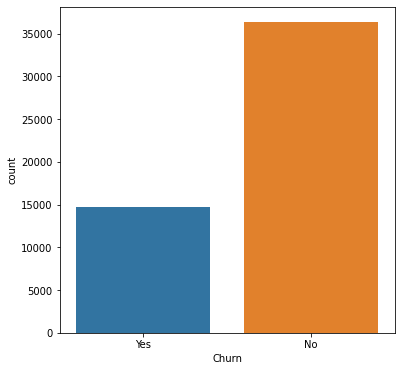

In [9]:
# Churn count plot
plt.figure(figsize=(6,6))
sns.countplot(df_train['Churn'])
plt.show()

We can see that the data is imbalanced with approx 70% 

Connvert the data according to model requirements

In [10]:
#label encoding for Churn Yes=1,No=0
df_train['Churn']= label_encoder.fit_transform(df_train['Churn'])
df_train['Churn'].unique()
df_train['Churn'].value_counts(dropna = False).sort_values()

1    14711
0    36336
Name: Churn, dtype: int64

Classifying dtypes as categorical and number features

In [11]:
# Y=df_train['Churn']
# df_train=df_train.drop(columns=['Churn'])

In [12]:
list_cat_features_with_numbers = ['CustomerID']

In [13]:
list_num_features = [column for column in df_train.drop(columns=['Churn']).select_dtypes(include = 'number').columns if (column not in list_cat_features_with_numbers)]
print(list_num_features, ", \n count =", len(list_num_features))

['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating'] , 
 count = 34


In [14]:
list_cat_features = [column for column in df_train.drop(columns=['Churn']).select_dtypes(include = 'object').columns]
print(list_cat_features, ",\n count =", len(list_cat_features))

['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus'] ,
 count = 22


# What are the distributions of the numerical features in the dataset?

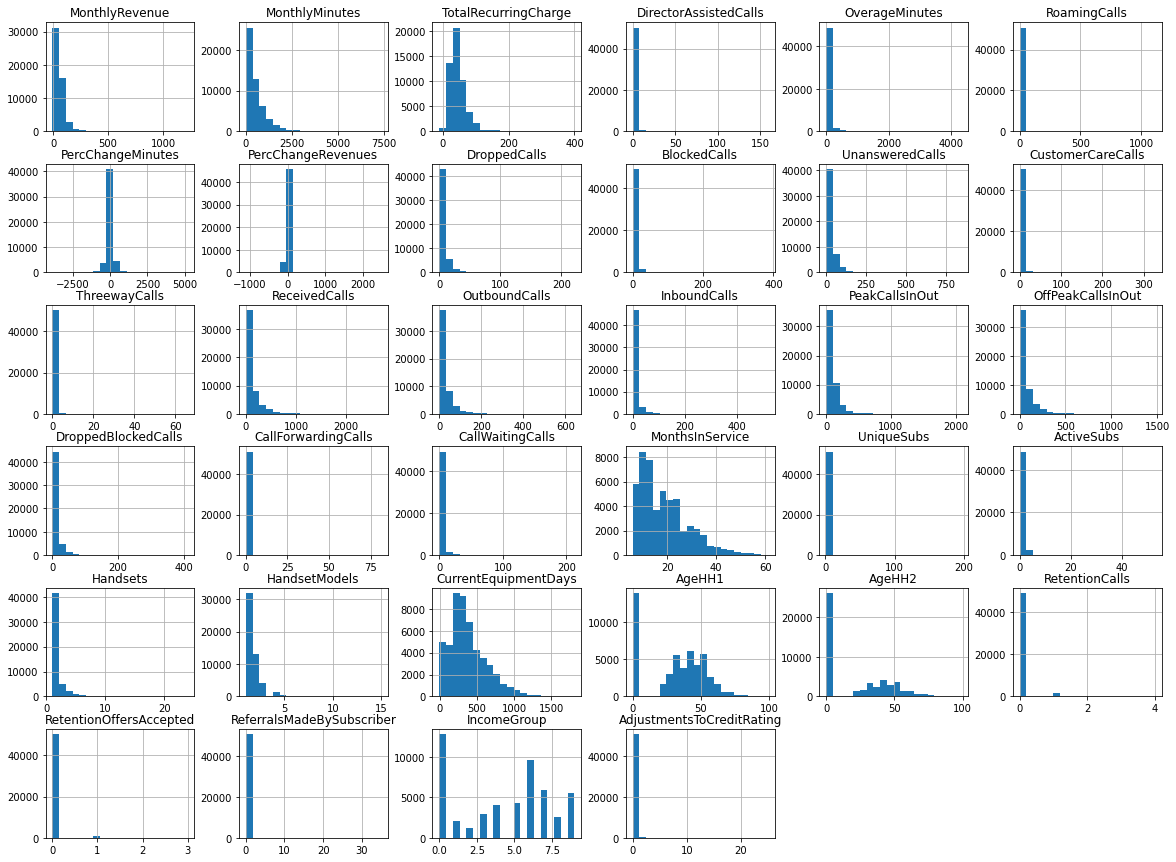

In [15]:
df_train[list_num_features].hist(bins = 20, figsize = (20, 15));

# What are the frequencies of each category of the categorical features in the dataset?

In [16]:
# fig, axes = plt.subplots(nrows = 22, ncols = 1, figsize = (25, 25)) # 22 plots in total
# fig.tight_layout()

# for i, column in enumerate(list_cat_features):
#     ax = df_train[column].value_counts(dropna = False, sort = False).plot(kind = 'barh', title = column, ax = axes[i])
#     ax.bar_label(ax.containers[0]);

# Are the class of the target variable 'Churn' linearly separable?

In [17]:
# sns.pairplot(df_train.iloc[:, :11], hue = 'Churn');

**Missing values**

In [18]:
# print("Any missing sample in training set:",df_train.isnull().values.any())
# print("Any missing sample in test set:",df_test.isnull().values.any(), "\n")

In [19]:
print("training data null values",df_train.isnull().sum())

training data null values CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentD

In [20]:
df_train.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating
count,5.104700e+04,51047.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,...,51046.000000,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000
mean,3.201957e+06,0.288185,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,...,1.805646,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911
std,1.169056e+05,0.452922,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,...,1.331173,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147
min,3.000002e+06,0.000000,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,...,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100632e+06,0.000000,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,...,1.000000,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201534e+06,0.000000,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,...,1.000000,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
75%,3.305376e+06,1.000000,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,...,2.000000,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000
max,3.399994e+06,1.000000,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,...,24.000000,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000


In [21]:
df_train['MonthlyRevenue']=df_train['MonthlyRevenue'].fillna(df_train['MonthlyRevenue'].median())
df_train['MonthlyMinutes']=df_train['MonthlyMinutes'].fillna(df_train['MonthlyMinutes'].median())
df_train['TotalRecurringCharge']=df_train['TotalRecurringCharge'].fillna(df_train['TotalRecurringCharge'].median())
df_train['DirectorAssistedCalls']=df_train['DirectorAssistedCalls'].fillna(df_train['DirectorAssistedCalls'].median())
df_train['OverageMinutes']=df_train['OverageMinutes'].fillna(df_train['OverageMinutes'].median())
df_train['RoamingCalls']=df_train['RoamingCalls'].fillna(df_train['RoamingCalls'].median())
df_train['PercChangeMinutes']=df_train['PercChangeMinutes'].fillna(df_train['PercChangeMinutes'].median())
df_train['PercChangeRevenues']=df_train['PercChangeRevenues'].fillna(df_train['PercChangeRevenues'].median())
df_train['AgeHH1']=df_train['AgeHH1'].fillna(df_train['AgeHH1'].median())
df_train['AgeHH2']=df_train['AgeHH2'].fillna(df_train['AgeHH2'].median())
df_train['Handsets']=df_train['Handsets'].fillna(df_train['Handsets'].median())
df_train['HandsetModels']=df_train['HandsetModels'].fillna(df_train['HandsetModels'].median())
df_train['CurrentEquipmentDays']=df_train['CurrentEquipmentDays'].fillna(df_train['CurrentEquipmentDays'].median())
df_train['ServiceArea']=df_train['ServiceArea'].fillna(df_train['ServiceArea'].mode()[0])

In [22]:
# # to a single column
# df_train['MonthlyRevenue'] = df_train['MonthlyRevenue'].replace(np.nan,0)

# # to whole dataframe
# df_train = df_train.replace(np.nan,0)

# df_train.replace(np.nan,0,inplace=True)
# print(df_train)

In [23]:
print("training data null values",df_train.isnull().sum())

training data null values CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2       

#Drop the unwanted columns

As there are 748 types of service areas it will create too many features when we will want to generate dummy variables so it's preferred to drop this column.

In [24]:
df_train['ServiceArea'].value_counts()

NYCBRO917    1708
HOUHOU281    1510
DALDAL214    1498
NYCMAN917    1182
APCFCH703     783
             ... 
OHIRAV330       1
OMANEW515       1
KCYHES316       1
AIRGEO843       1
NCRDNN910       1
Name: ServiceArea, Length: 747, dtype: int64

In [25]:
df_train = df_train.drop(['ServiceArea'], axis = 1)

### Checking variables coherence

In [26]:
print('\n', df_train['NewCellphoneUser'].value_counts(), '\n')
print('\n', df_train['NotNewCellphoneUser'].value_counts())


 No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64 


 No     44012
Yes     7035
Name: NotNewCellphoneUser, dtype: int64


NotNewCellphoneUser should be the exact opposite of the NewCellphoneUser feature. \ Based on the distribution of the "Yes" and "No" values of both columns, we found an incoherence and thus we have to drop of one them. \ Since NewCellphoneUser is more comprehensive, we will keep this one.

In [27]:
df_train = df_train.drop(['NotNewCellphoneUser'], axis = 1)

In [28]:
def encode(df):
  for i in df.columns:
    if df.dtypes[i] == object:
      label_encoder.fit(df[i].astype(str))
      df[i] = label_encoder.transform(df[i].astype(str))
  return df

In [29]:
df_train=encode(df_train)
# df_train.info()

In [30]:
print(df_train.columns)
print(len(df_train.columns))

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
       'Adjustm

**Splitting data**

In [31]:
X=df_train.drop(columns=['Churn'])
Y=df_train['Churn']
print(X.shape)
print(Y.shape)

(51047, 55)
(51047,)


In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (40837, 55)
Y train shape:  (40837,)
X test shape:  (10210, 55)
Y test shape:  (10210,)


Normalize the data

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler_baseline = MinMaxScaler().fit(X_train)
X_train_scaled = scaler_baseline.transform(X_train)

# Apply the same scaling to the validation data
X_val_baseline_scaled = scaler_baseline.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 1.0)
lr_model.fit(X_train_scaled, Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = lr_model.predict(X_val_baseline_scaled)

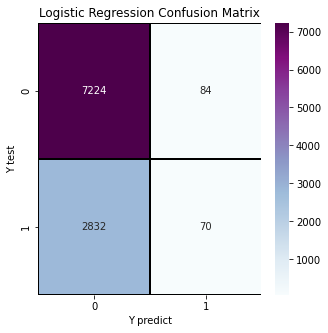

In [47]:
# The confusion matrix
lcm = confusion_matrix(Y_test, y_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lcm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [48]:
cm = pd.crosstab(y_pred, Y_test, rownames = ['Predicted Values'], colnames = ['Actual values'])
cm

Actual values,0,1
Predicted Values,,
0,7224,2832
1,84,70


In [49]:
score_1 = lr_model.score(X_test, Y_test)
print(score_1)

0.7157688540646425


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
